In [2]:
import sys
sys.path.insert(0, '../src')
sys.path.insert(0, '../')

import numpy as np
import torch
import matplotlib.pyplot as plt

from drawing import draw_window, visualize_score_map
from image import get_image_tensor, get_numpy_image
from shape import Window, Position
from roi_align import RoIAlignFeatureExtractor
from matcher import CnnMatcher, Window
from image import load_image
from feature_extractor import CNN, ReCNN
from candidates import Candidates
from scorer import CosineSimilarityScorer


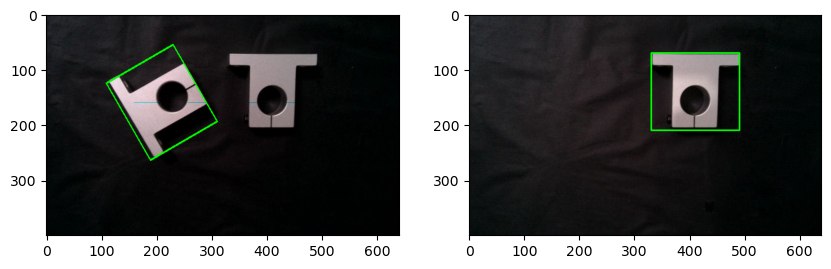

In [3]:
target_img = load_image('../data/image_1.png')
template_img = load_image('../data/template_1.jpg')

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

target_window = Window(210, 160, 160, 140, -120)
draw_img = draw_window(target_img, target_window)
axes[0].imshow(draw_img)
axes[0].set_title('target')

template_window = Window(410., 140., 160., 140., 0)
draw_img = draw_window(template_img, template_window)
axes[1].imshow(draw_img)
axes[1].set_title('template')

# Center base(CNN)

Coords(cx=205, cy=70)


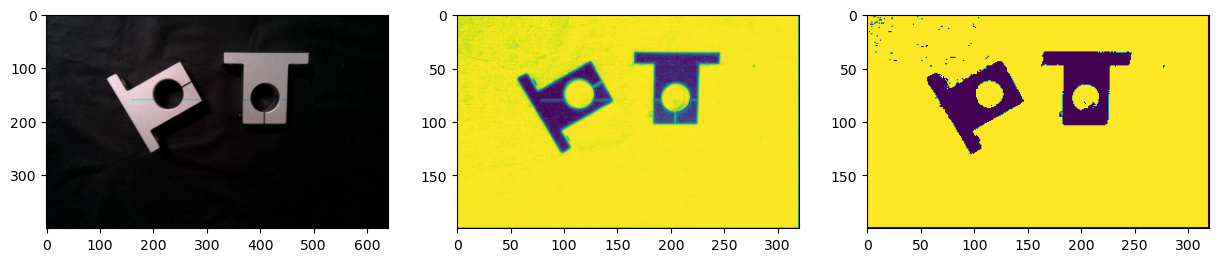

Coords(cx=103, cy=35)


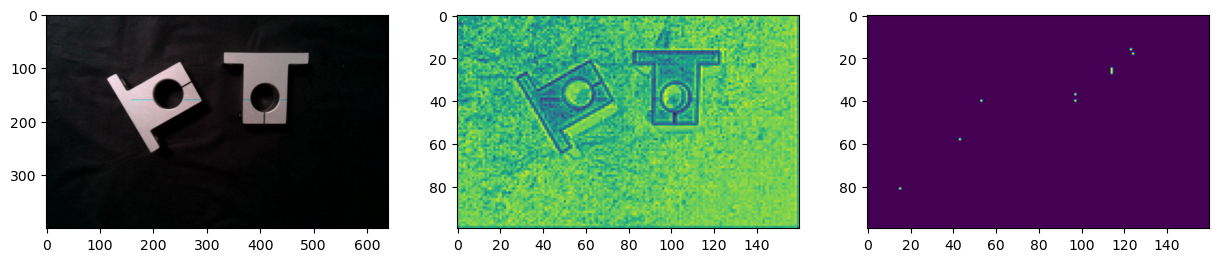

Coords(cx=51, cy=18)


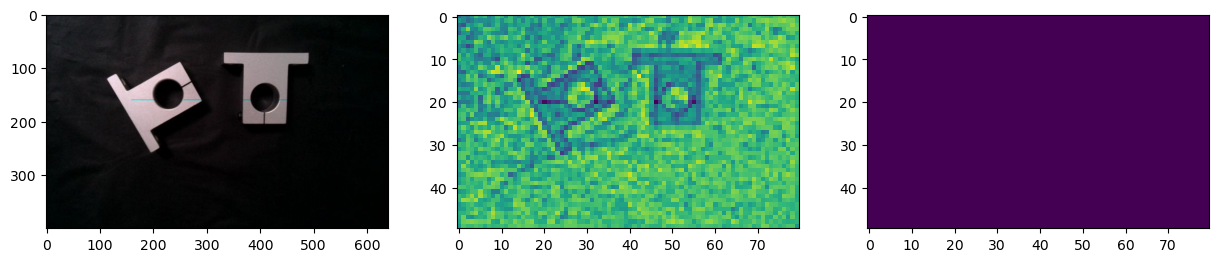

Coords(cx=26, cy=9)


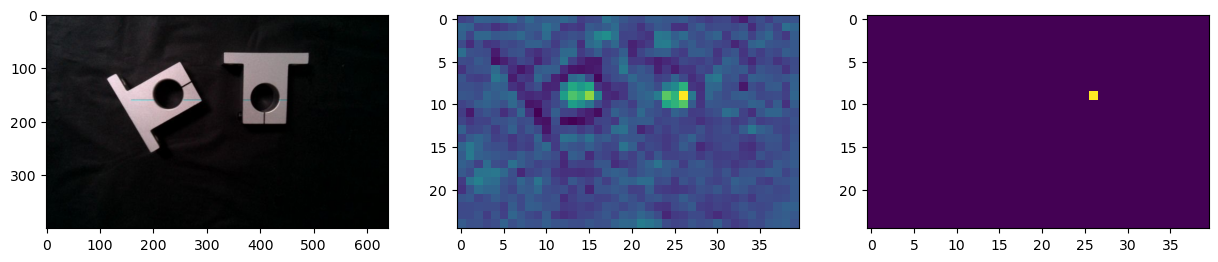

In [4]:
feature_extractor = CNN()
scorer = CosineSimilarityScorer()

template_feature_maps = feature_extractor(template_img)
target_feature_maps = feature_extractor(target_img)

scales = [2, 4, 8, 16]

for idx, scale in enumerate(scales):
    template_center = template_window.get_center(spatial_scale=1.0/scale)
    print(template_center)

    template_center_features = template_feature_maps[idx][:, :, template_center.cy, template_center.cx]

    target_feature_map = target_feature_maps[idx]
    _, _, h, w = target_feature_map.shape
    score_map = scorer.score(template_center_features, target_feature_map.view(-1, h*w).T).reshape(h, w)
    visualize_score_map(target_img, score_map)

# Center base(ReCNN)

/opt/conda/lib/python3.7/site-packages/e2cnn/nn/modules/r2_conv/basisexpansion_singleblock.py:80: UserWarning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instead. (Triggered internally at /usr/local/src/pytorch/aten/src/ATen/native/IndexingUtils.h:27.)
  full_mask[mask] = norms.to(torch.uint8)


Coords(cx=205, cy=70)


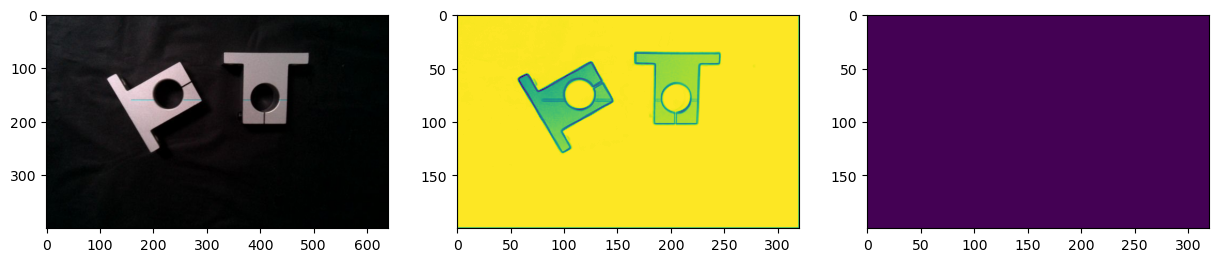

Coords(cx=103, cy=35)


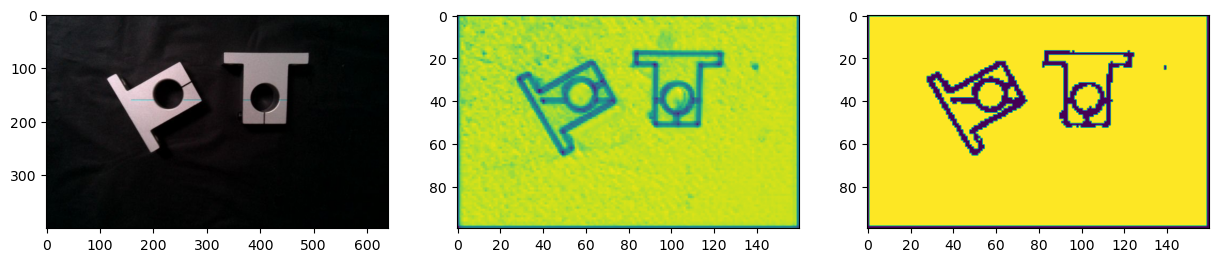

Coords(cx=51, cy=18)


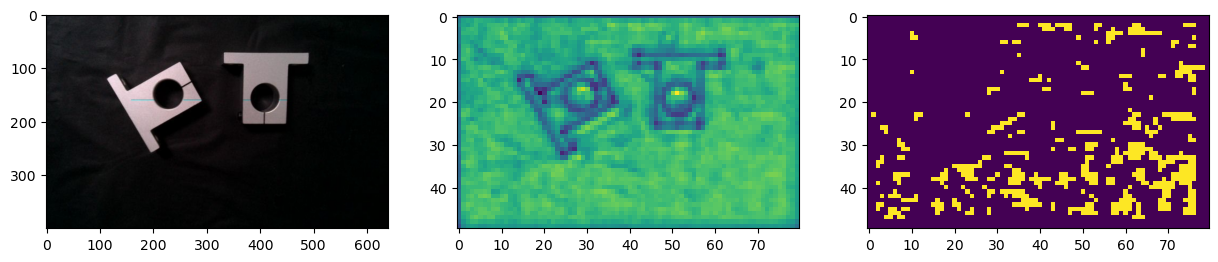

Coords(cx=26, cy=9)


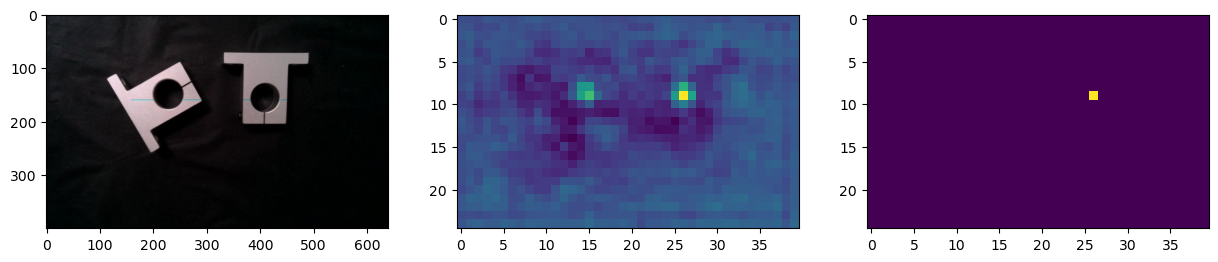

In [5]:

feature_extractor = ReCNN()
scorer = CosineSimilarityScorer()

template_feature_maps = feature_extractor(template_img)
target_feature_maps = feature_extractor(target_img)

scales = [2, 4, 8, 16]

for idx, scale in enumerate(scales):
    template_center = template_window.get_center(spatial_scale=1.0/scale)
    print(template_center)

    template_center_features = template_feature_maps[idx][:, :, template_center.cy, template_center.cx]

    target_feature_map = target_feature_maps[idx]
    _, _, h, w = target_feature_map.shape
    score_map = scorer.score(template_center_features, target_feature_map.view(-1, h*w).T).reshape(h, w)
    visualize_score_map(target_img, score_map)